In [1]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
import nltk 

In [3]:
all_files = glob.glob("./data_list/my*.xls")
all_files

['./data_list/myCabinetExcelData (4).xls',
 './data_list/myCabinetExcelData (8).xls',
 './data_list/myCabinetExcelData (9).xls',
 './data_list/myCabinetExcelData (5).xls',
 './data_list/myCabinetExcelData (2).xls',
 './data_list/myCabinetExcelData (3).xls',
 './data_list/myCabinetExcelData (1).xls',
 './data_list/myCabinetExcelData (6).xls',
 './data_list/myCabinetExcelData.xls',
 './data_list/myCabinetExcelData (7).xls']

In [4]:
all_files_data = []

In [8]:
for file in all_files:
    data_frame = pd.read_excel(file)
    #print(data_frame)
    all_files_data.append(data_frame)
print(len(all_files_data))

10


In [9]:
print(all_files_data)

[    Unnamed: 0   번호                                                 제목  \
0          NaN    1                  Big data promises big opportunity   
1          NaN    2  Big data vs accurate data in health research: ...   
2          NaN    3  Data stream classification and big data analytics   
3          NaN    4  Big Data and Privacy: Why Public Organizations...   
4          NaN    5  Big data on individuals in the architectural d...   
..         ...  ...                                                ...   
95         NaN   96  Big data analytics sentiment: US-China reactio...   
96         NaN   97  Big Data In the first of three articles on Big...   
97         NaN   98  Big data driven lithium-ion battery modeling m...   
98         NaN   99  Big data in multiple sclerosis: development of...   
99         NaN  100  Data Fusion of Small Sample Flying Test Data a...   

                                                   저자  \
0                                           Davis, B.

In [10]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big data promises big opportunity,"Davis, B.",INSTITUTE OF PETROLEUM,2014
1,NaN,2,Big data vs accurate data in health research: ...,"Brodie, M.A.; Pliner, E.M.; Ho, A.; Li, Kalina...","Elsevier Science B.V., Amsterdam",2018
2,NaN,3,Data stream classification and big data analytics,"Krawczyk, B.; Stefanowski, J.; Wozniak, M.","Elsevier Science B.V., Amsterdam.",2015
3,NaN,4,Big Data and Privacy: Why Public Organizations...,"Prince, Christopher",University of Toronto Press; 1998,2017
4,NaN,5,Big data on individuals in the architectural d...,"Meekings, Scott; Schnabel, Marc Aurel",Taylor & Francis,2017
...,...,...,...,...,...,...
995,NaN,96,Efficient data management tools for the hetero...,"Alekseev, A. A.; Osipova, V. V.; Ivanov, M. A....",Springer Science + Business Media,2016
996,NaN,97,Securing Big Data Provenance for Auditors: The...,"Appelbaum, Deniz",Strategic and Emerging Technologies Section of...,2016
997,NaN,98,Demystifying big data: Anatomy of big data dev...,"Shin, Dong-Hee","Elsevier Science B.V., Amsterdam.",2016
998,NaN,99,Assessing Whether “Big Data” Solutions Provide...,"Hertz, D.; Gavaghan, M.; Garfield, S.","Elsevier Science B.V., Amsterdam",2014


In [12]:
all_title = all_files_data_concat['제목']
all_title

0                      Big data promises big opportunity
1      Big data vs accurate data in health research: ...
2      Data stream classification and big data analytics
3      Big Data and Privacy: Why Public Organizations...
4      Big data on individuals in the architectural d...
                             ...                        
995    Efficient data management tools for the hetero...
996    Securing Big Data Provenance for Auditors: The...
997    Demystifying big data: Anatomy of big data dev...
998    Assessing Whether “Big Data” Solutions Provide...
999    Why Big Data Is a Big Deal A new class of data...
Name: 제목, Length: 1000, dtype: object

In [ ]:
# iterator data(반복자) - list, Series, tuple

In [15]:
type(all_title)

pandas.core.series.Series

In [13]:
stopwords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [14]:
words = []

In [23]:
for title in all_title:
    # print(title)
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))   
    # print(EnWords)
    EnWordsToken = word_tokenize(EnWords.lower())
    # print(EnWordsToken)
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopwords] #익명함수, 클로저 
    # print(EnWordsTokenStop)
#     def call(var):
#         result = []
#         for w in EnWordsToken:
#             if w not in stopwords:
#                 result.append(w)
#         return result
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
#     def call2(EnWordsTokenStop):
#         result2 = []
#         for w2 in EnWordsTokenStop:
#             result2.append(lemma.lemmatize(w2))
#         return result2
    # print(EnWordsTokenStopLemma)
    words.append(EnWordsTokenStopLemma)

In [24]:
words

[['big', 'data', 'promise', 'big', 'opportunity'],
 ['big',
  'data',
  'v',
  'accurate',
  'data',
  'health',
  'research',
  'large',
  'scale',
  'physical',
  'activity',
  'monitoring',
  'smartphones',
  'wearable',
  'device',
  'risk',
  'unconscious',
  'bias'],
 ['data', 'stream', 'classification', 'big', 'data', 'analytics'],
 ['big', 'data', 'privacy', 'public', 'organization', 'adopt', 'big', 'data'],
 ['big',
  'data',
  'individual',
  'architectural',
  'design',
  'process',
  'combining',
  'individual',
  'data',
  'architect',
  'toolset'],
 ['big', 'data', 'operation', 'basis', 'benchmarking', 'data', 'grid'],
 ['big', 'data', 'benchmark', 'big', 'd'],
 ['big', 'data', 'ownership', 'data', 'recent', 'development', 'europe'],
 ['big', 'survey', 'big', 'data', 'centre'],
 ['big',
  'data',
  'approach',
  'trauma',
  'outcome',
  'prediction',
  'autonomous',
  'resuscitation',
  'shiming',
  'yang',
  'mary',
  'njoku',
  'colin',
  'f',
  'mackenzie',
  'discus',

In [32]:
words2 = reduce(lambda x, y: x + y, words)
print(type(words2))
words2[:10]

<class 'list'>


['big',
 'data',
 'promise',
 'big',
 'opportunity',
 'big',
 'data',
 'v',
 'accurate',
 'data']

In [33]:
count = Counter(words2)
count

Counter({'big': 1354,
         'data': 1645,
         'promise': 13,
         'opportunity': 31,
         'v': 3,
         'accurate': 3,
         'health': 37,
         'research': 38,
         'large': 18,
         'scale': 12,
         'physical': 3,
         'activity': 2,
         'monitoring': 7,
         'smartphones': 1,
         'wearable': 2,
         'device': 10,
         'risk': 12,
         'unconscious': 1,
         'bias': 3,
         'stream': 8,
         'classification': 8,
         'analytics': 137,
         'privacy': 17,
         'public': 11,
         'organization': 3,
         'adopt': 1,
         'individual': 6,
         'architectural': 1,
         'design': 14,
         'process': 19,
         'combining': 3,
         'architect': 1,
         'toolset': 1,
         'operation': 6,
         'basis': 1,
         'benchmarking': 2,
         'grid': 3,
         'benchmark': 2,
         'd': 1,
         'ownership': 1,
         'recent': 4,
         'development

In [34]:
word_count = dict()

In [37]:
count.most_common(50)

[('data', 1645),
 ('big', 1354),
 ('analytics', 137),
 ('analysis', 67),
 ('based', 62),
 ('using', 57),
 ('science', 50),
 ('system', 50),
 ('management', 48),
 ('challenge', 47),
 ('approach', 44),
 ('mining', 40),
 ('research', 38),
 ('new', 38),
 ('health', 37),
 ('model', 37),
 ('cloud', 34),
 ('smart', 34),
 ('learning', 33),
 ('opportunity', 31),
 ('processing', 30),
 ('technology', 28),
 ('small', 27),
 ('information', 26),
 ('framework', 26),
 ('computing', 25),
 ('application', 25),
 ('driven', 24),
 ('social', 24),
 ('issue', 24),
 ('deal', 23),
 ('network', 23),
 ('quality', 23),
 ('knowledge', 22),
 ('review', 22),
 ('use', 22),
 ('efficient', 22),
 ('era', 22),
 ('storage', 21),
 ('healthcare', 21),
 ('perspective', 21),
 ('service', 21),
 ('open', 20),
 ('process', 19),
 ('survey', 19),
 ('making', 19),
 ('platform', 19),
 ('large', 18),
 ('decision', 18),
 ('business', 18)]

In [38]:
for tag, counts in count.most_common(50):
    if (len(str(tag)) > 1):
        word_count[tag] = counts
print(word_count)

{'data': 1645, 'big': 1354, 'analytics': 137, 'analysis': 67, 'based': 62, 'using': 57, 'science': 50, 'system': 50, 'management': 48, 'challenge': 47, 'approach': 44, 'mining': 40, 'research': 38, 'new': 38, 'health': 37, 'model': 37, 'cloud': 34, 'smart': 34, 'learning': 33, 'opportunity': 31, 'processing': 30, 'technology': 28, 'small': 27, 'information': 26, 'framework': 26, 'computing': 25, 'application': 25, 'driven': 24, 'social': 24, 'issue': 24, 'deal': 23, 'network': 23, 'quality': 23, 'knowledge': 22, 'review': 22, 'use': 22, 'efficient': 22, 'era': 22, 'storage': 21, 'healthcare': 21, 'perspective': 21, 'service': 21, 'open': 20, 'process': 19, 'survey': 19, 'making': 19, 'platform': 19, 'large': 18, 'decision': 18, 'business': 18}


In [39]:
del word_count['big']
del word_count['data']

In [42]:
key_list = list(word_count.keys())
key_list[:10]

['analytics',
 'analysis',
 'based',
 'using',
 'science',
 'system',
 'management',
 'challenge',
 'approach',
 'mining']

In [46]:
sorted_keys_list = sorted(key_list) # sorted(key_list, reverse=True)
sorted_keys_list[:10]

['analysis',
 'analytics',
 'application',
 'approach',
 'based',
 'business',
 'challenge',
 'cloud',
 'computing',
 'deal']

In [50]:
sorted_values = sorted(word_count.values(), reverse=True)
sorted_values[:10]

[137, 67, 62, 57, 50, 50, 48, 47, 44, 40]

In [51]:
dict2 = {"name" : ["홍길동", "김길동", "송길동"], "age" : [100, 200, 300]}

In [52]:
dict2.keys()

dict_keys(['name', 'age'])

In [53]:
dict3 = {"분석" : 245, "챌린지" : 100}

In [57]:
keys3 = dict3.keys()
keys3

dict_keys(['분석', '챌린지'])

In [55]:
dict2.values()

dict_values([['홍길동', '김길동', '송길동'], [100, 200, 300]])

In [56]:
dict3.values()

dict_values([245, 100])

In [60]:
list_keys3 = list(keys3)
list_keys3

['분석', '챌린지']

In [62]:
sorted(list_keys3, reverse=True)

['챌린지', '분석']

In [64]:
list_values3 = list(dict3.values())
sorted(list_values3, reverse=True)

[245, 100]

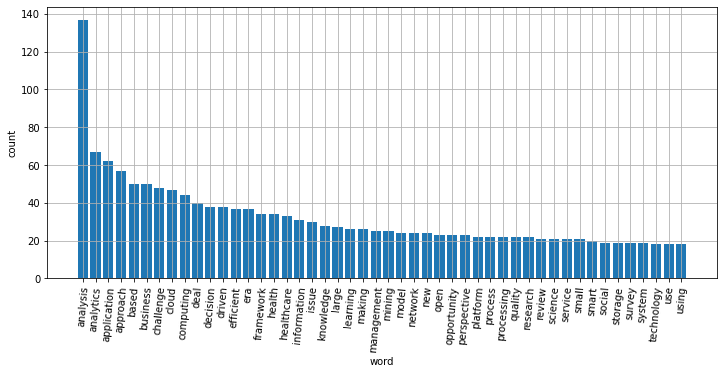

In [71]:
plt.figure(figsize=(12,5))
plt.xlabel('word')
plt.ylabel('count')
plt.grid(True)

plt.bar(range(len(word_count)), sorted_values)
plt.xticks(range(len(word_count)), sorted_keys_list, rotation='85')
plt.show()